In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris

## 3-1. この節の目標
この節では主に教師ありの場合、すなわち$q_\theta(y|{\bf x})$のモデルとしてニューラルネットワークを導入してみましょう。初めに言ってしまうと、ニューラルネットワークとは何のことはない

$$
{\bf x} 
\overset{\text{linear}}{\to}
\cdot
\overset{\text{non-linear}}{\to}
{\bf h}_1
\overset{\text{linear}}{\to}
\cdot
\overset{\text{non-linear}}{\to}
{\bf h}_2
\to \dots
\to
{\bf h}_L
$$

という関数のことであり、多くの場合、**非線形変換は固定**し、**線形変換のパラメータを変化**させ、出力 ${\bf h}_L$ が望む値になるようにする、というものです。以下では再びアヤメデータを使って、簡単なニューラルネットワークの構成から、これを用いた分類までを [TensorFlow](https://www.tensorflow.org) で実装した例をお見せします。その後、続く小節でそれぞれの部分について説明したいと思います。

### アヤメデータを用いた教師あり学習
アヤメデータは以下で読み込めるのでした：

In [2]:
iris = load_iris() # アヤメデータ読み込み

このオブジェクトには色々なデータが入っています。特に今回は
- `iris.data`: 入力 ${\bf x}_n$ のデータ
- `iris.target`: 望む答え $y_n$ のデータ

を使います。学習用データは2個とばしで偶数インデックスのものとします：

In [3]:
X_train, Y_train = iris.data[::2], iris.target[::2] # 偶数番目のデータ

#### ニューラルネットワーク
ニューラルネットワークはクラスとして実装します。以下では

$$
{\bf x} (4D) \to {\bf h}_1(10D) \to {\bf h}_2(3D)
$$

を設計しています。

In [8]:
H=10
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(H, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

ここで`activation='softmax'`はソフトマックス関数と呼ばれるものを指定しており、

$$
\text{softmax}({\bf u}) = \frac{1}{\sum_{i} e^{u^i}} (e^{u^1}, e^{u^2}, \dots, e^{u^{dim}})
$$

と定義されます。また、`activation='relu'`は

$$
\text{relu}({\bf u}) = (\max\{0, u^1\}, \max\{0, u^2\}, \dots, \max\{0, u^{dim}\})
$$

という関数です。

#### 学習の設定
どんな目的関数を、どのように小さくするかの設定

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

`optimizer='adam'`はどのような最適化手法を使うかを示し、`loss='sparse_categorical_crossentropy'`は経験誤差としてクロスエントロピーと呼ばれる関数を表します。ここでは分類数が3なので、${\bf y}_{model} \in [0,1]^3, y \in \{0,1,2\}$ として

$$
cross\_entropy({\bf y}_{model}, y) = - \log ({\bf y}_{model})^{y\text{-th component}}
$$

を表します。
> sparseを抜いた`loss='categorical_crossentropy'`というのもありますが、これは教師信号が ${\bf y} = (0,1,0)$ のように正解ラベルの部分だけ1, それ以外の値はゼロのベクトル形式で表現されている場合に使うもので、本質的には同じ物です。

#### 学習実行
Tensorflowの場合、`model.fit(X,Y)`で学習させられます。より細かい設定をしたい場合は後述します。

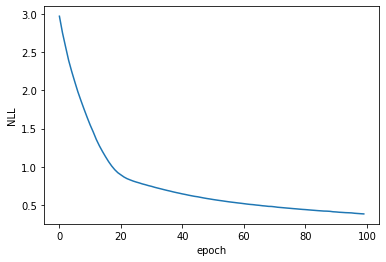

In [10]:
Hist= model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)
# 学習曲線のプロット
plt.xlabel("epoch"); plt.ylabel("NLL")
plt.plot(np.arange(100), Hist.history['loss']);plt.show()

#### 新しいデータでテスト

In [8]:
X_test, Y_test = iris.data[1::2], iris.target[1::2]

answer: [2] prediction: 2


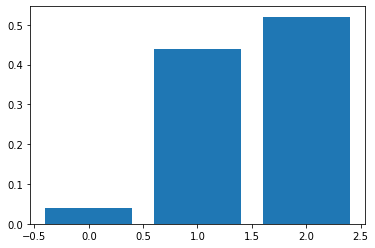

In [9]:
i = np.random.randint(len(Y_test))
x, y = X_test[i:i+1], Y_test[i:i+1]
y_pred = model.predict(x)
print('answer:', y, 'prediction:', np.argmax(y_pred))
plt.bar(np.arange(3), y_pred[0]); plt.show()

正しく分類できているのがわかります。